In [1]:
#분류 ANN을 위한 인공지능 모델 구현
from keras import layers, models

Using TensorFlow backend.


In [2]:
#분산 방식 모델링을 포함하는 함수형 구현
class ANN_models_class(models.Model):
    def __init__(self, Nin, Nh, Nout):
        #Prepare network layers and activate functions
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')
        softmax = layers.Activation('softmax')
        
        # Connect network elements
        x = layers.Input(shape=(Nin,))
        h = relu(hidden(x))
        y = softmax(output(h))
        
        super().__init__(x,y)
        self.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

In [3]:
#분류 ANN에 사용할 데이터 불러오기

import numpy as np
from keras import datasets #mnist
from keras.utils import np_utils

def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
    
    Y_train = np_utils.to_categorical(y_train) # 1,2,3 .... 8,9 가 아닌 벡터값으로 바꾸어 계산을 용이하고 빠르게 ex 000001,000011
    Y_test = np_utils.to_categorical(y_test)
    
    
    L, W, H = X_train.shape
    X_train = X_train.reshape(-1,W*H) # 한줄의 784 벡터값으로 변환
    X_test = X_test.reshape(-1,W*H)
    
    X_train = X_train / 255.0  # 0~255 사이의 정수값으로 입력된 값을( 이미지 값이기 때문에 ) 255로 나누어 0~1 사이의 실수로 바꾸어 준다
    X_test = X_test / 255.0
    
    return (X_train,Y_train), (X_test, Y_test)

In [4]:
# 함수의 accuracy와 loss를 시각화 해줄 plot 함수 구현

import matplotlib.pyplot as plt


def plot_loss(history):
#summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Test'],loc=0)
    
def plot_acc(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Test'],loc=0)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 3s 55us/step - loss: 0.3859 - acc: 0.8933 - val_loss: 0.2064 - val_acc: 0.9431
Epoch 2/15
48000/48000 [==============================] - 1s 25us/step - loss: 0.1850 - acc: 0.9474 - val_loss: 0.1579 - val_acc: 0.9568
Epoch 3/15
48000/48000 [==============================] - 1s 24us/step - loss: 0.1341 - acc: 0.9619 - val_loss: 0.1301 - val_acc: 0.9635
Epoch 4/15
48000/48000 [==============================] - 1s 26us/step - loss: 0.1050 - acc: 0.9703 - val_loss: 0.1145 - val_acc: 0.9672
Epoch 5/15
48000/48000 [==============================] - 1s 26us/step - loss: 0.0846 - acc: 0.9755 - val_loss: 0.1102 - val_acc: 0.9684
Epoch 6/15
48000/48000 [==============================] - 1s 25us/step - loss: 0.0706 - acc: 0.9801 - val_loss: 0.1005 - val_acc: 0.9701
Epoch 7/

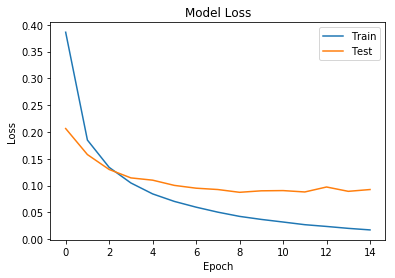

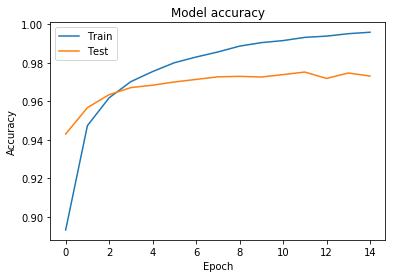

In [5]:
def main():
    Nin = 784 #필기체 input의 백터
    Nh = 100 #은닉 노드의 개수
    number_of_class = 10 # 필기체 output의 클래스 개수
    Nout = number_of_class
    
    model = ANN_models_class(Nin,Nh,Nout)
    (X_train, Y_train), (X_test, Y_test) = Data_func()
    
    history = model.fit(X_train,Y_train, epochs=15,
                       batch_size = 100, validation_split=0.2)
    performance_test = model.evaluate(X_test, Y_test, batch_size = 100)
    print('Test Loss and Accuracy ->',performance_test)
    
    plot_loss(history)
    plt.show()
    plot_acc(history)
    plt.show()
    
    
#Run cde

if __name__ == '__main__':
    main()